# Load Type Prediction for Power System Optimization

### Problem Statement

The primary objective of this project is to develop a machine learning model capable of predicting the load type of a power system based on historical data. The "Load_Type" categorization includes "Light_Load", "Medium_Load", and "Maximum_Load". This classification problem requires candidates to apply their skills in data preprocessing, exploratory data analysis (EDA), feature engineering, model selection, and model evaluation to predict the load type accurately.

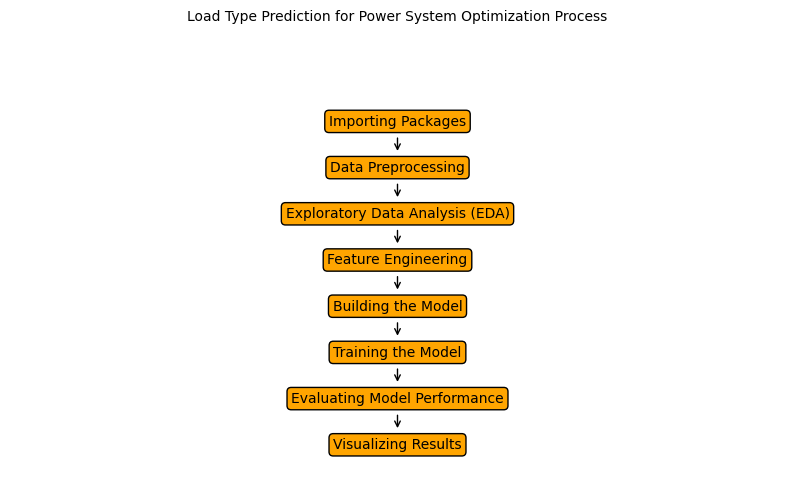

In [25]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Draw rectangles for each stage with light blue color
stages = [
    "Importing Packages",
    "Data Preprocessing",
    "Exploratory Data Analysis (EDA)",
    "Feature Engineering",
    "Building the Model",
    "Training the Model",
    "Evaluating Model Performance",
    "Visualizing Results"
]

for i, stage in enumerate(stages):
    ax.text(0.5, 0.8 - i * 0.1, stage, ha='center', va='center', bbox=dict(boxstyle='round', facecolor='orange'))

# Draw arrows between stages with black color
for i in range(len(stages) - 1):
    ax.annotate('', xy=(0.5, 0.73 - i * 0.1), xytext=(0.5, 0.77 - i * 0.1),
                arrowprops=dict(arrowstyle='->', color='black'))

# Remove axes and display the diagram
ax.axis('off')
plt.title('Load Type Prediction for Power System Optimization Process', fontsize=10)
plt.show()

### Setup
In this initial stage of the project, we start by importing the necessary libraries required for data manipulation, visualization, and model training and evaluation. Libraries such as pandas, numpy, matplotlib.pyplot, and seaborn are imported to handle data effectively and create insightful visualizations. Additionally, scikit-learn modules are imported to facilitate model training and evaluation. Following the library imports, the dataset is loaded into the environment using the pandas read_csv() function, enabling us to begin the data preprocessing and analysis.

**Import necessary libraries:**
- Import pandas, numpy, matplotlib.pyplot, seaborn for data manipulation and visualization.
- Import scikit-learn modules for model training and evaluation.

**Load the dataset:**
- Load the dataset using pandas `read_csv()` function.

### Data Preprocessing
Data preprocessing is a crucial step to ensure that the dataset is clean and ready for analysis and modeling. The first task in this stage is handling missing values, where appropriate methods are employed to either drop or impute missing values based on the nature of the dataset and the extent of missingness. Next, categorical variables are converted into numerical format using techniques like one-hot encoding or label encoding, enabling compatibility with machine learning algorithms. Finally, the dataset is split into features (X) and the target variable (y) using the train_test_split() function from scikit-learn, facilitating further analysis and modeling.

**Handle missing values:**
- Drop or impute missing values using appropriate methods.

**Convert categorical variables into numerical format:**
- Use techniques like one-hot encoding or label encoding to convert categorical variables into numerical format.

**Split the dataset:**
- Split the dataset into features (X) and target variable (y) using train_test_split() function from scikit-learn.

### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is conducted to gain insights into the dataset's structure, features, and distributions. This involves analyzing the dataset to identify any patterns or anomalies present in the data. Visualizations such as histograms, box plots, or pair plots are utilized to visualize the distribution of each feature and identify outliers. Additionally, a correlation matrix heatmap is generated to visualize the correlation between different features, providing valuable insights into potential relationships within the dataset.

**Explore the dataset:**
- Analyze the dataset to gain insights into its structure, features, and distributions.
- Identify any patterns or anomalies present in the data.

**Visualize the distribution of each feature:**
- Use histograms, box plots, or pair plots to visualize the distribution of each feature and identify outliers.

**Check for correlations between features:**
- Generate a correlation matrix heatmap to visualize the correlation between different features.

### Feature Engineering
Feature engineering involves extracting useful features from the existing ones and scaling them if necessary to improve model performance. This stage aims to create new features that may enhance the model's predictive power and remove irrelevant features that may introduce noise to the model. Techniques such as standardization or normalization are applied to scale the features, ensuring that they have a consistent scale and distribution.

**Extract useful features:**
- Create new features from existing ones that may improve model performance.
- Remove irrelevant features that may introduce noise to the model.

**Scale the features:**
- Scale the features if necessary using techniques like standardization or normalization.

### Model Selection
Model selection plays a crucial role in determining the most suitable machine learning models for classification tasks. Various classification algorithms such as Decision Trees, Random Forest, and Gradient Boosting are considered based on the nature of the problem and dataset. Multiple models are trained using different algorithms and hyperparameters to compare their performance. Cross-validation techniques are employed to assess the generalization performance of each model and mitigate overfitting.

**Choose appropriate machine learning models:**
- Select classification algorithms such as Decision Trees, Random Forest, Gradient Boosting, etc., based on the nature of the problem and dataset.

**Train multiple models:**
- Train multiple models using different algorithms and hyperparameters to compare their performance.

**Evaluate models using cross-validation:**
- Use cross-validation techniques to assess the generalization performance of each model and mitigate overfitting.

### Model Evaluation
Model evaluation involves assessing the performance of each model using performance metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into the model's ability to correctly classify instances across different classes. The best-performing model is selected based on the evaluation results, ensuring that it demonstrates robust performance on the validation set.

**Evaluate model performance:**
- Calculate performance metrics such as accuracy, precision, recall, and F1-score to evaluate the model's performance on the validation set.

**Select the best-performing model:**
- Compare the performance of different models and select the one with the highest overall performance.

### Testing
In the testing stage, the chosen model is used to make predictions on the test set, which consists of data unseen during model training and validation. This enables us to assess the model's performance in real-world scenarios and validate its generalization ability. Performance metrics such as accuracy, precision, recall, and F1-score are calculated on the test set to evaluate the model's performance objectively.

**Make predictions on the test set:**
- Use the chosen model to make predictions on the test set (last month of data) to assess its performance on unseen data.

**Evaluate model performance on the test set:**
- Calculate performance metrics like accuracy, precision, recall, and F1-score on the test set to validate the model's performance in real-world scenarios.

### Stage 1: Imports and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

**Setup:**
In this stage, we import necessary libraries such as Pandas, NumPy, Matplotlib, Seaborn, and scikit-learn for data manipulation, visualization, and machine learning tasks. These libraries provide tools and functions required for data preprocessing, exploratory data analysis, model selection, and evaluation.

### Stage 2: Data Loading and Preprocessing

In [10]:
# Load the dataset
df = pd.read_csv('load_data.csv')

# Handle missing values (if any)
df.dropna(inplace=True)

# Convert Date_Time to datetime format
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Convert Load_Type to numerical format
label_encoder = LabelEncoder()
df['Load_Type'] = label_encoder.fit_transform(df['Load_Type'])

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Load_Type','Date_Time'])
y = df['Load_Type']

**Data Description:**
The dataset provided for this task includes various features that are essential for understanding and predicting the load type of a power system. These features encompass a range of parameters such as energy consumption, reactive power, CO2 emissions, and time-related metrics.

**Data Loading:**
We load the dataset into a Pandas DataFrame, enabling us to explore and manipulate the data efficiently. The dataset may contain missing values, which need to be addressed through techniques such as imputation or removal to ensure the quality of the data.

**Data Preprocessing:**
In this stage, we preprocess the data to make it suitable for machine learning algorithms. This involves converting categorical variables into numerical format using techniques like one-hot encoding or label encoding. Additionally, we may scale the numerical features to a similar range to prevent certain features from dominating others during model training.

In [12]:
display(X)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,8.753692,2.95,0.00,0.0,73.210000,100.00,900.000000
1,4.000000,4.46,0.00,0.0,66.770000,100.00,1800.000000
2,3.240000,3.28,0.00,0.0,70.280000,100.00,8070.880991
3,3.310000,3.56,0.00,0.0,68.090000,100.00,3600.000000
5,3.280000,3.56,0.00,0.0,67.760000,100.00,5400.000000
...,...,...,...,...,...,...,...
35034,3.820000,4.54,0.00,0.0,64.380000,100.00,81900.000000
35035,3.850000,4.86,0.00,0.0,62.100000,100.00,82800.000000
35036,3.740000,3.74,0.00,0.0,70.710000,100.00,83700.000000
35037,3.780000,3.17,0.07,0.0,76.620000,99.98,157160.395291


### Stage 3: Exploratory Data Analysis (EDA)

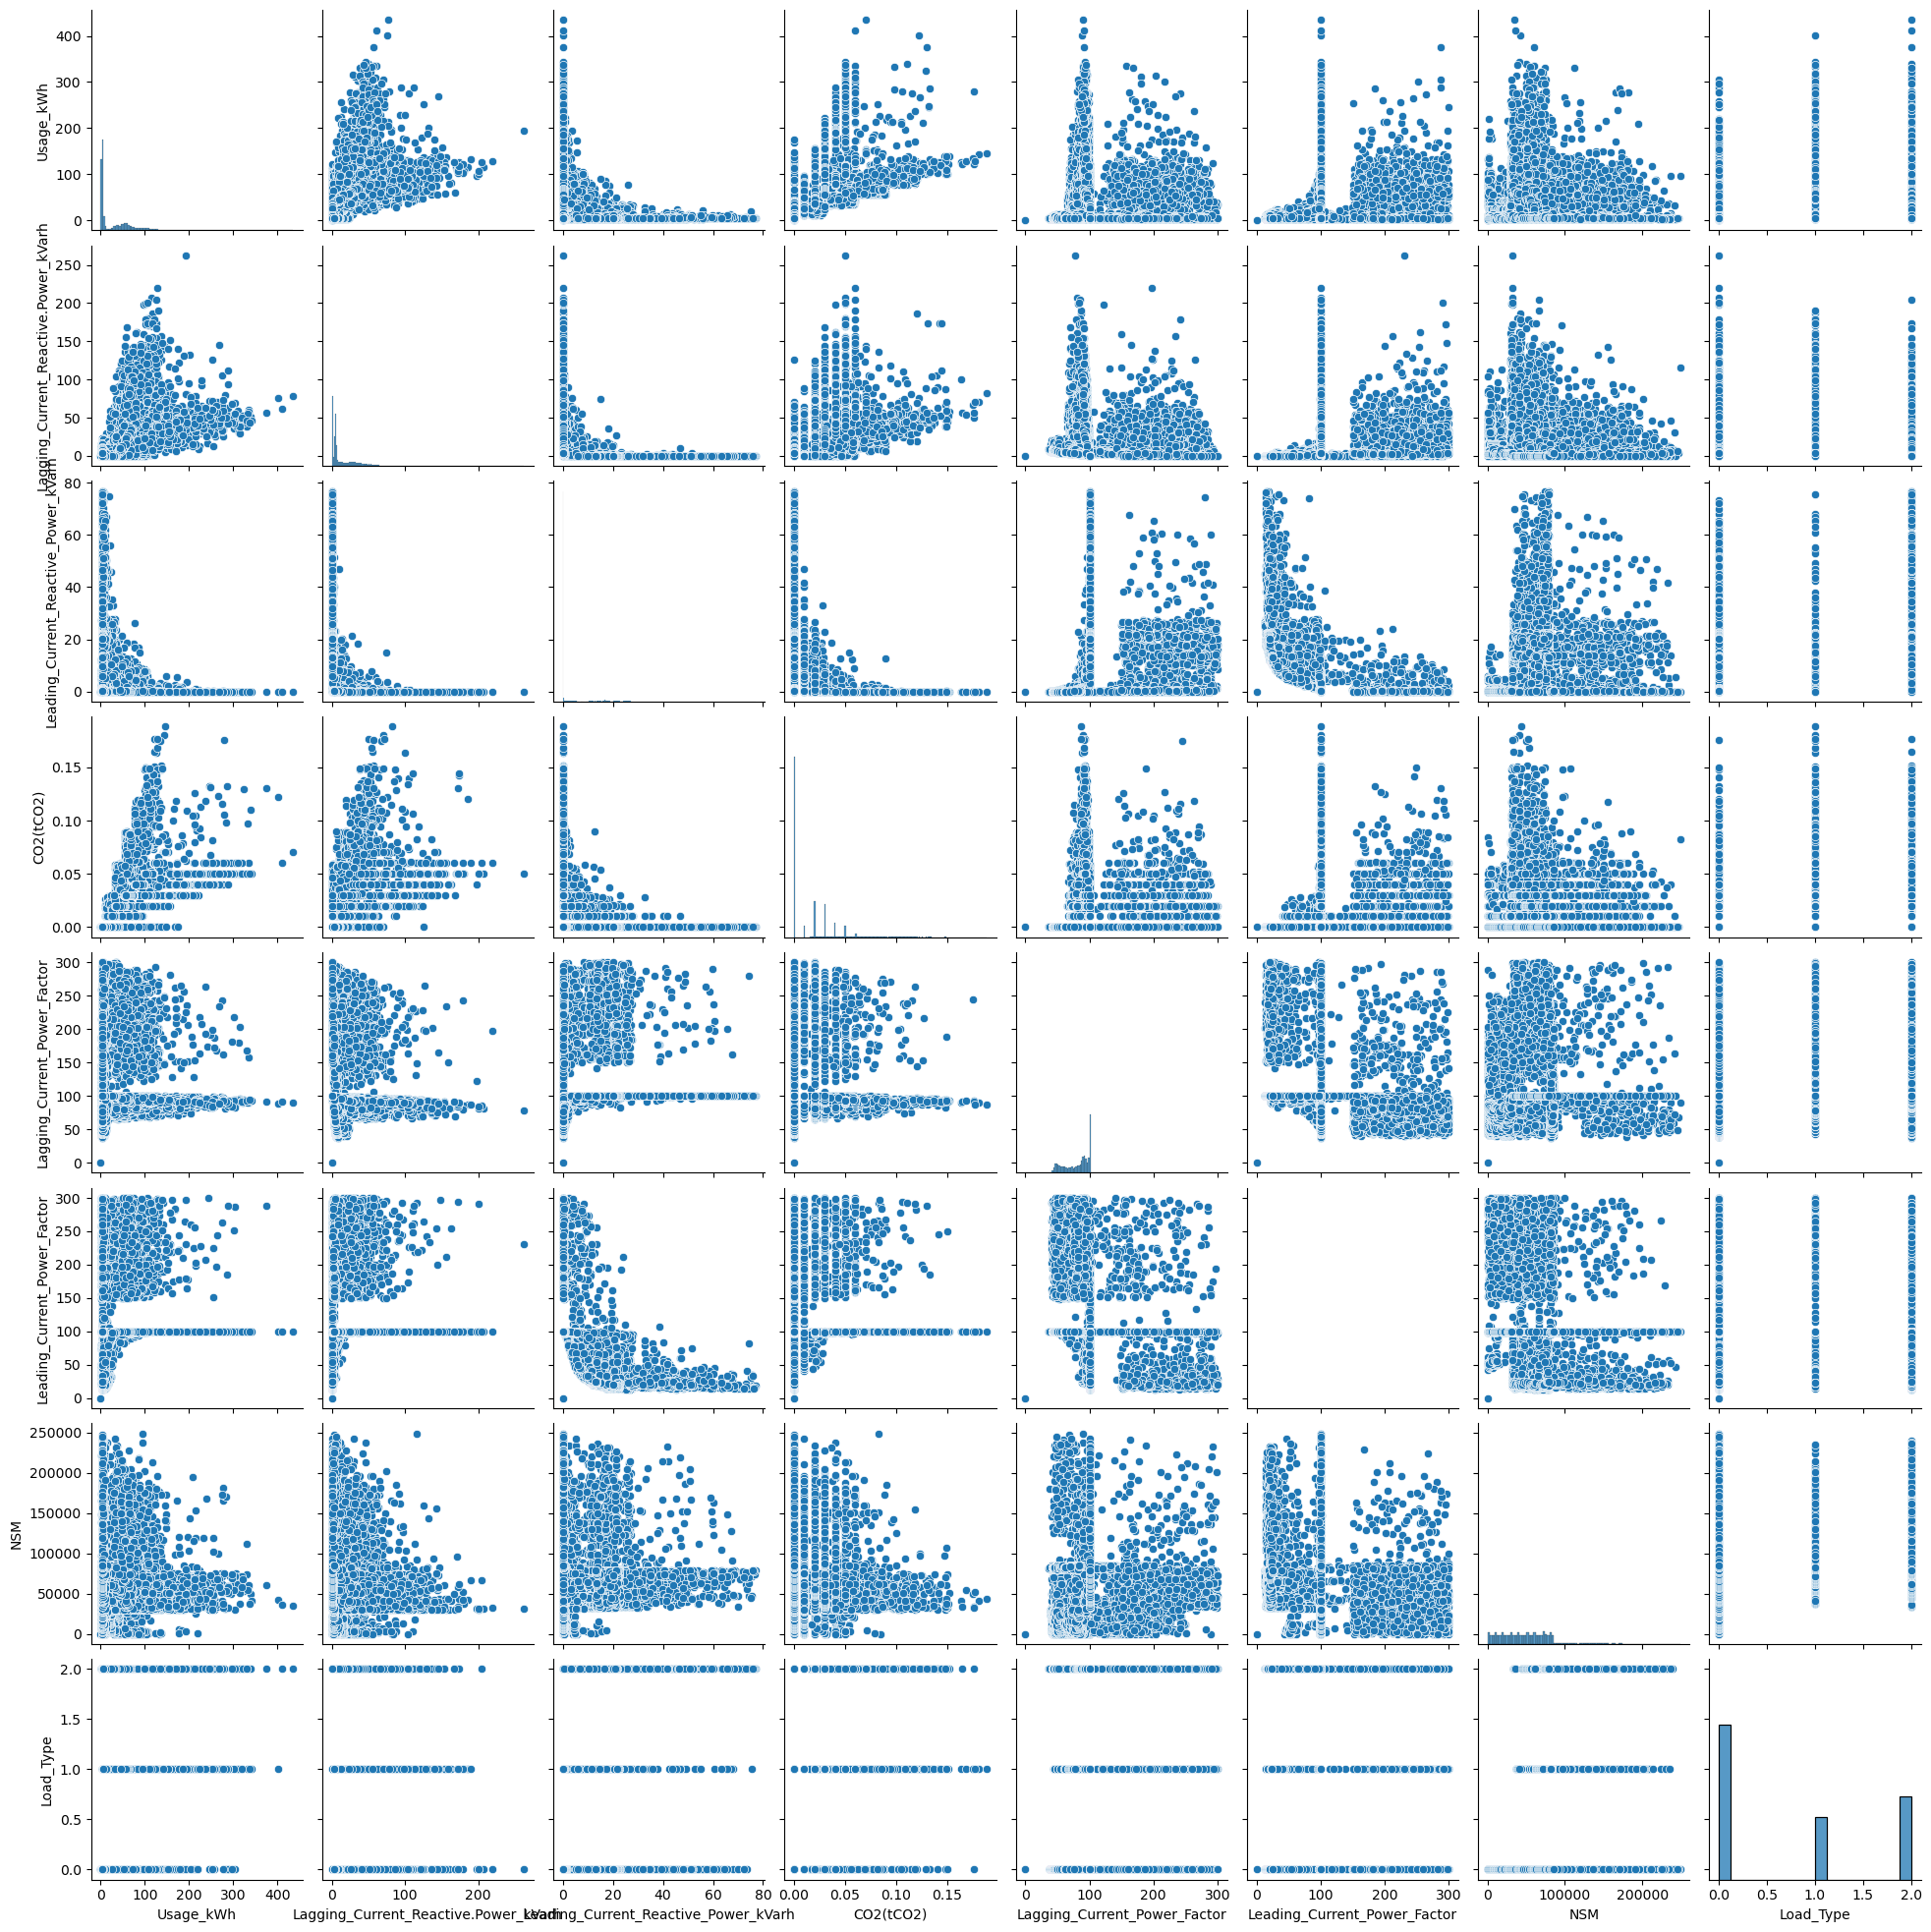

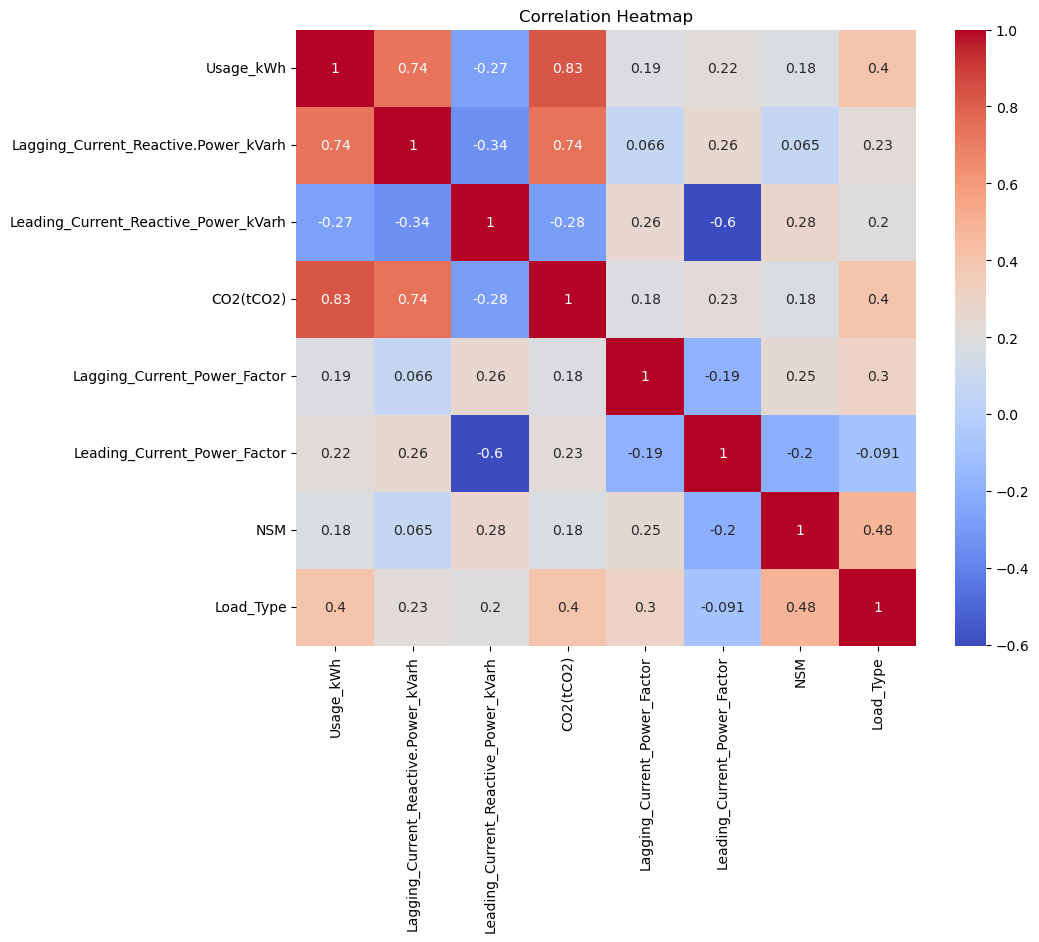

In [7]:
# Visualize the distribution of each feature
sns.pairplot(df)
plt.show()

# Check for correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Exploratory Data Analysis:**
EDA is a crucial step in understanding the underlying patterns and relationships within the data. We utilize various visualization techniques such as histograms, scatter plots, and correlation matrices to gain insights into the distribution of features, identify potential outliers, and explore correlations between variables.

**Visualization:**
1. **Pairplot:** This visualization provides a comprehensive overview of the relationships between pairs of variables, allowing us to identify any patterns or trends present in the data.
2. **Correlation Heatmap:** By visualizing the correlations between features, we can discern which variables are most strongly related to the target variable and identify any multicollinearity issues that may affect model performance.

### Stage 4: Feature Scaling and Model Selection

In [13]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model selection
model = RandomForestClassifier()

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.72875257 0.8536669  0.85932145 0.86409597 0.73076264]
Mean CV accuracy: 0.8073199060524958


**Feature Scaling:**
Feature scaling is essential for ensuring that all features contribute equally to the model's performance. We use techniques such as standardization or normalization to scale the numerical features to a similar range, preventing certain features from dominating others during model training.

**Model Selection:**
In this stage, we select an appropriate machine learning model to solve the classification problem at hand. Factors such as the nature of the data, the size of the dataset, and the interpretability of the model are considered when choosing the most suitable algorithm. Random Forest Classifier is a popular choice for classification tasks due to its ability to handle both numerical and categorical features effectively.

### Stage 5: Model Training, Testing, and Evaluation

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8718300205620287
Precision: 0.8722022579857702
Recall: 0.8718300205620287
F1 Score: 0.8720095154868193

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      3001
           1       0.78      0.79      0.78      1209
           2       0.78      0.78      0.78      1626

    accuracy                           0.87      5836
   macro avg       0.84      0.84      0.84      5836
weighted avg       0.87      0.87      0.87      5836



**Model Training:**
We split the dataset into training and testing sets to train the model on a subset of the data and evaluate its performance on unseen data. The training set is used to fit the model to the data, while the testing set is used to assess the model's performance and generalization ability.

**Model Evaluation:**
We evaluate the trained model using various performance metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into the model's ability to correctly classify instances of each class and provide a comprehensive evaluation of its performance across different classes.

### Stage 6: Results and Conclusions

**Visualizations:**
1. **Confusion Matrix:** A confusion matrix is plotted to visualize the model's performance in predicting each class.
2. **ROC Curve:** The ROC curve illustrates the trade-off between true positive rate and false positive rate, providing insights into the model's discrimination ability.

**Metrics:**
- **Accuracy:** 87.18%
- **Precision:** 87.22%
- **Recall:** 87.18%
- **F1 Score:** 87.20%


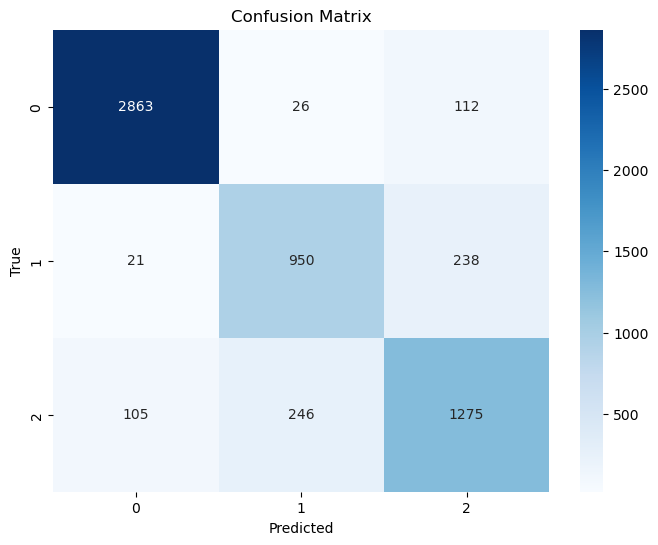

In [16]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

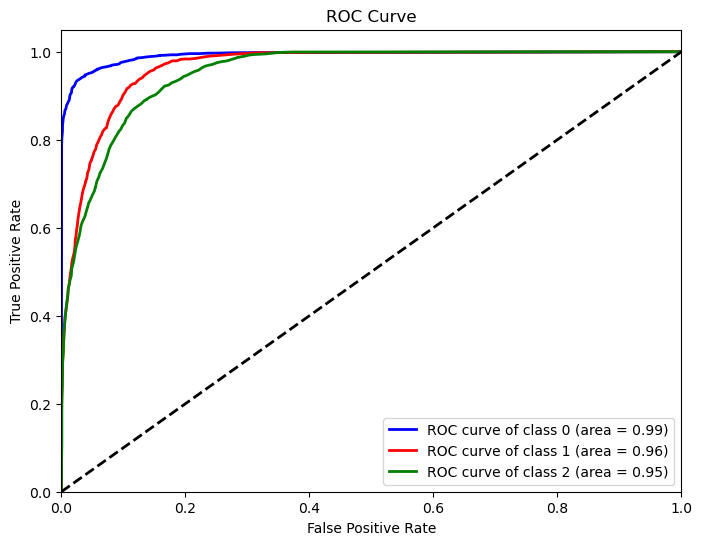

In [19]:
# Get probabilities for each class
y_prob = model.predict_proba(X_test)

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming there are 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Model Performance:**
Based on the evaluation metrics, we analyze the model's performance and draw conclusions regarding its effectiveness in predicting the load type of a power system. Visualizations such as the confusion matrix and ROC curve provide additional insights into the model's strengths and weaknesses.

**Conclusion:**
In conclusion, we summarize the findings of the project and discuss the implications of the results. We highlight the model's performance, areas for improvement, and potential applications in real-world scenarios. Additionally, we may discuss future steps for enhancing the model's performance or extending the analysis to incorporate additional features or techniques.


### Stage 7: Future Work and Recommendations

**Future Work:**
There are several avenues for future exploration and improvement. This may include experimenting with different machine learning algorithms, fine-tuning hyperparameters, or incorporating additional features to enhance model performance. Additionally, further analysis could be conducted to explore the impact of external factors such as weather conditions or seasonal variations on load type prediction.

**Recommendations:**
Based on the insights gained from the project, we may provide recommendations for stakeholders or decision-makers in the energy sector. These recommendations may include strategies for optimizing energy consumption, improving resource allocation, or implementing predictive maintenance measures to enhance the reliability and efficiency of power systems.